## Fashion-MNIST 
Dataset 
- train set : 30000
- test set : 40000

Frame work 
- Keras v2.1.6 

Final model Acc
- 92.455


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

In [0]:
N = 30000
test_data = np.concatenate((test_data, train_data[N:]), axis=0)
test_labels = np.concatenate((test_labels, train_labels[N:]), axis=0)

train_data = train_data[:N]
train_labels = train_labels[:N]

In [4]:
print(train_data.shape)
print(test_data.shape)

(30000, 28, 28)
(40000, 28, 28)


In [0]:
idx2label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

label = Ankle boot


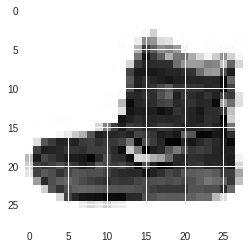

In [6]:
index = 0
print("label = {}".format(idx2label[train_labels[index]]))
plt.imshow(train_data[index])
plt.show()

In [0]:
# label to categorical
train_labels = to_categorical(np.array(train_labels))
test_labels = to_categorical(np.array(test_labels))

In [0]:
# Validation data set 
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [0]:
X_test = test_data
y_test = test_labels

In [10]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(24000, 28, 28)
(6000, 28, 28)
(40000, 28, 28)


In [11]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(24000, 10)
(6000, 10)
(40000, 10)


In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
print("X_test: {}".format(X_test.shape))

X_test: (40000, 28, 28, 1)


In [0]:
# Data normalization 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

# Model 1 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Training 

In [24]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 3s 136us/step - loss: 1.0684 - acc: 0.6006 - val_loss: 0.5846 - val_acc: 0.7767
Epoch 2/100
24000/24000 [==============================] - 2s 104us/step - loss: 0.6314 - acc: 0.7605 - val_loss: 0.4915 - val_acc: 0.8195
Epoch 3/100
24000/24000 [==============================] - 2s 103us/step - loss: 0.5441 - acc: 0.7964 - val_loss: 0.4273 - val_acc: 0.8377
Epoch 4/100
24000/24000 [==============================] - 2s 99us/step - loss: 0.4953 - acc: 0.8150 - val_loss: 0.3982 - val_acc: 0.8565
Epoch 5/100
24000/24000 [==============================] - 2s 95us/step - loss: 0.4511 - acc: 0.8328 - val_loss: 0.3496 - val_acc: 0.8743
Epoch 6/100
24000/24000 [==============================] - 2s 93us/step - loss: 0.4229 - acc: 0.8442 - val_loss: 0.3421 - val_acc: 0.8768
Epoch 7/100
24000/24000 [==============================] - 2s 90us/step - loss: 0.3933 - acc: 0.8563 - val_loss: 0.3204 

In [25]:
print('TEST ACC : ', score[1])

TEST ACC :  0.917


# Model 2

In [0]:
batch_size = 32
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 13s 560us/step - loss: 0.9146 - acc: 0.6521 - val_loss: 0.5409 - val_acc: 0.7848
Epoch 2/100
24000/24000 [==============================] - 12s 508us/step - loss: 0.5879 - acc: 0.7800 - val_loss: 0.4577 - val_acc: 0.8288
Epoch 3/100
24000/24000 [==============================] - 12s 488us/step - loss: 0.5137 - acc: 0.8113 - val_loss: 0.4174 - val_acc: 0.8495
Epoch 4/100
24000/24000 [==============================] - 12s 494us/step - loss: 0.4624 - acc: 0.8303 - val_loss: 0.3570 - val_acc: 0.8680
Epoch 5/100
24000/24000 [==============================] - 13s 525us/step - loss: 0.4328 - acc: 0.8429 - val_loss: 0.3324 - val_acc: 0.8815
Epoch 6/100
24000/24000 [==============================] - 12s 516us/step - loss: 0.4014 - acc: 0.8542 - val_loss: 0.3081 - val_acc: 0.8855
Epoch 7/100
24000/24000 [==============================] - 13s 528us/step - loss: 0.3791 - acc: 0.8613 - val_lo

In [22]:
print('TEST ACC : ', score[1])

TEST ACC :  0.905475


In [66]:
#92.1125
batch_size = 32
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu',kernel_initializer='random_normal'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding ="valid"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
         
          
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 19s 803us/step - loss: 0.7804 - acc: 0.7041 - val_loss: 0.4645 - val_acc: 0.8275
Epoch 2/100
24000/24000 [==============================] - 17s 715us/step - loss: 0.4767 - acc: 0.8246 - val_loss: 0.3713 - val_acc: 0.8543
Epoch 3/100
24000/24000 [==============================] - 17s 710us/step - loss: 0.4080 - acc: 0.8517 - val_loss: 0.3314 - val_acc: 0.8758
Epoch 4/100
24000/24000 [==============================] - 17s 698us/step - loss: 0.3723 - acc: 0.8634 - val_loss: 0.2993 - val_acc: 0.8883
Epoch 5/100
24000/24000 [==============================] - 17s 714us/step - loss: 0.3329 - acc: 0.8772 - val_loss: 0.2818 - val_acc: 0.9002
Epoch 6/100
24000/24000 [==============================] - 17s 722us/step - loss: 0.3243 - acc: 0.8814 - val_loss: 0.2840 - val_acc: 0.8985
Epoch 7/100
24000/24000 [==============================] - 17s 721us/step - loss: 0.3030 - acc: 0.8897 - val_lo

In [67]:
print('TEST ACC : ', score[1])

TEST ACC :  0.921125


In [69]:
# 0.924525
batch_size = 256
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu',kernel_initializer='random_normal'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding ="valid"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
         
          
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 7s 284us/step - loss: 1.1147 - acc: 0.5847 - val_loss: 0.6245 - val_acc: 0.7590
Epoch 2/100
24000/24000 [==============================] - 5s 202us/step - loss: 0.6384 - acc: 0.7505 - val_loss: 0.5611 - val_acc: 0.7803
Epoch 3/100
24000/24000 [==============================] - 5s 199us/step - loss: 0.5443 - acc: 0.7898 - val_loss: 0.4332 - val_acc: 0.8377
Epoch 4/100
24000/24000 [==============================] - 5s 196us/step - loss: 0.4755 - acc: 0.8214 - val_loss: 0.3938 - val_acc: 0.8505
Epoch 5/100
24000/24000 [==============================] - 5s 198us/step - loss: 0.4301 - acc: 0.8403 - val_loss: 0.3472 - val_acc: 0.8705
Epoch 6/100
24000/24000 [==============================] - 5s 195us/step - loss: 0.3924 - acc: 0.8553 - val_loss: 0.3184 - val_acc: 0.8797
Epoch 7/100
24000/24000 [==============================] - 5s 197us/step - loss: 0.3663 - acc: 0.8665 - val_loss: 0.3

In [73]:
print('TEST ACC : ', score[1])

TEST ACC :  0.924525


In [74]:
# 92.455
batch_size = 256
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding ="valid"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
         
          
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 6s 271us/step - loss: 1.2248 - acc: 0.5497 - val_loss: 0.5894 - val_acc: 0.7727
Epoch 2/100
24000/24000 [==============================] - 5s 192us/step - loss: 0.6381 - acc: 0.7597 - val_loss: 0.4622 - val_acc: 0.8178
Epoch 3/100
24000/24000 [==============================] - 5s 194us/step - loss: 0.5299 - acc: 0.8023 - val_loss: 0.4319 - val_acc: 0.8342
Epoch 4/100
24000/24000 [==============================] - 5s 195us/step - loss: 0.4670 - acc: 0.8312 - val_loss: 0.3538 - val_acc: 0.8653
Epoch 5/100
24000/24000 [==============================] - 5s 195us/step - loss: 0.4201 - acc: 0.8499 - val_loss: 0.3300 - val_acc: 0.8757
Epoch 6/100
24000/24000 [==============================] - 5s 195us/step - loss: 0.3832 - acc: 0.8615 - val_loss: 0.3043 - val_acc: 0.8932
Epoch 7/100
24000/24000 [==============================] - 5s 197us/step - loss: 0.3577 - acc: 0.8718 - val_loss: 0.2

In [75]:
print('TEST ACC : ', score[1])

TEST ACC :  0.92455


In [80]:
# 
batch_size = 256
num_classes = 10
epochs = 100

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28, 28, 1), activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding ="same"))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
         
          
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 24000 samples, validate on 6000 samples
Epoch 1/100
24000/24000 [==============================] - 6s 266us/step - loss: 1.0025 - acc: 0.6304 - val_loss: 0.5450 - val_acc: 0.7942
Epoch 2/100
24000/24000 [==============================] - 5s 193us/step - loss: 0.5579 - acc: 0.8002 - val_loss: 0.3979 - val_acc: 0.8530
Epoch 3/100
24000/24000 [==============================] - 5s 192us/step - loss: 0.4483 - acc: 0.8408 - val_loss: 0.3444 - val_acc: 0.8750
Epoch 4/100
24000/24000 [==============================] - 5s 193us/step - loss: 0.3984 - acc: 0.8603 - val_loss: 0.3372 - val_acc: 0.8748
Epoch 5/100
24000/24000 [==============================] - 5s 193us/step - loss: 0.3581 - acc: 0.8741 - val_loss: 0.3144 - val_acc: 0.8822
Epoch 6/100
24000/24000 [==============================] - 5s 193us/step - loss: 0.3349 - acc: 0.8817 - val_loss: 0.2797 - val_acc: 0.8955
Epoch 7/100
24000/24000 [==============================] - 5s 192us/step - loss: 0.3068 - acc: 0.8888 - val_loss: 0.2

In [81]:
print('TEST ACC : ', score[1])

TEST ACC :  0.916375
